 # Gadolinium Dixebox Simulation Analysis

In [25]:
import glob
import gdls_physics
import time
import numpy as np
import matplotlib.pyplot as plt
import tabulate

## Get Data

In [2]:
gd158_shells, gd158_energies = gdls_physics.dicebox_simulation_reader.get_dicebox_simulation_results('/cvmfs/lz.opensciencegrid.org/BACCARAT/Dicebox-DB/Gd158-23Oct18/*.txt')

Number to process = 200 
Progress: [####################] 100.0% 
Average time 0.1s 
Time: 00:00:25 
Remaining time 00:00:00


In [3]:
gd156_shells, gd156_energies = gdls_physics.dicebox_simulation_reader.get_dicebox_simulation_results('/cvmfs/lz.opensciencegrid.org/BACCARAT/Dicebox-DB/Gd156-23Oct18/*.txt')

Number to process = 200 
Progress: [####################] 100.0% 
Average time 0.1s 
Time: 00:00:25 
Remaining time 00:00:00


### Save 

In [5]:
np.save('simulations/dicebox/gd158_energies.npy', gd158_energies)
np.save('simulations/dicebox/gd158_shells.npy', gd158_shells)

In [6]:
np.save('simulations/dicebox/gd156_energies.npy', gd156_energies)
np.save('simulations/dicebox/gd156_shells.npy', gd156_shells)

## Load

In [2]:
gd158_energies = np.load('simulations/dicebox/gd158_energies.npy', allow_pickle=True)
gd158_shells = np.load('simulations/dicebox/gd158_shells.npy', allow_pickle=True)

In [3]:
gd156_energies = np.load('simulations/dicebox/gd156_energies.npy', allow_pickle=True)
gd156_shells = np.load('simulations/dicebox/gd156_shells.npy', allow_pickle=True)

## Process

### N Steps

In [10]:
n_gd158 = [len(shell) for shell in gd158_shells]
n_gd156 = [len(shell) for shell in gd156_shells]

In [11]:
bins = range(13)
gd158_weights, _ = np.histogram(n_gd158, bins=bins)
gd156_weights, _ = np.histogram(n_gd156, bins=bins)
gdls_physics.dicebox_simulation_reader.save_for_latex(gd158_weights, bins, 'simulations/dicebox/latex_outputs/gd158_n_steps.txt', 'Lower\tUpper\tWeight\n', 'hist')
gdls_physics.dicebox_simulation_reader.save_for_latex(gd156_weights, bins, 'simulations/dicebox/latex_outputs/gd156_n_steps.txt', 'Lower\tUpper\tWeight\n', 'hist')

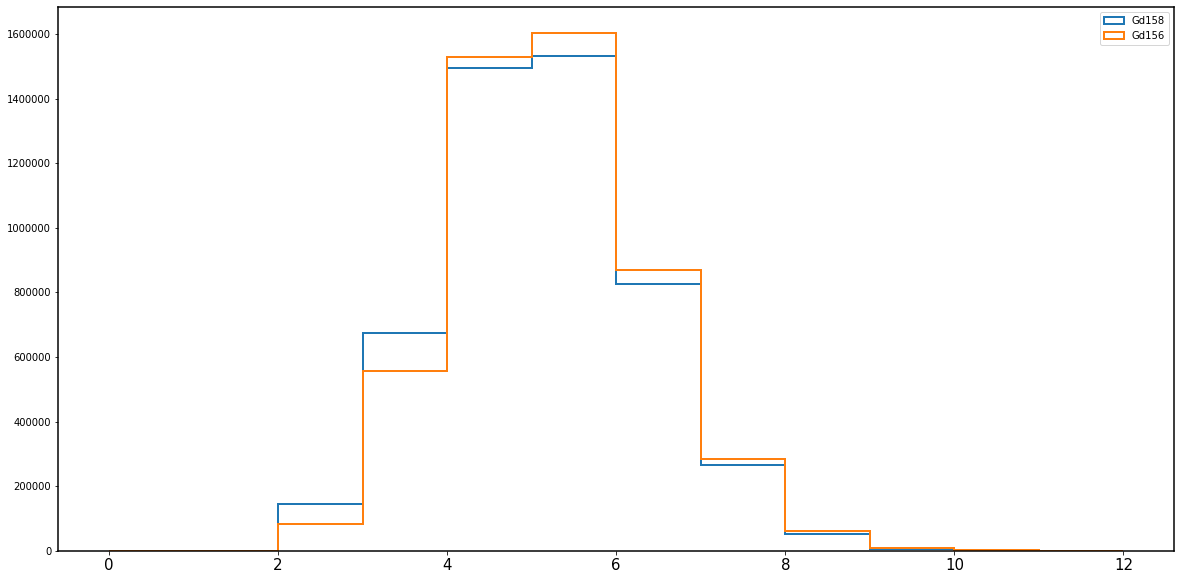

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.hist(bins[:-1], bins=bins, weights=gd158_weights, label='Gd158', histtype='step', linewidth=2)
ax.hist(bins[:-1], bins=bins, weights=gd156_weights, label='Gd156', histtype='step', linewidth=2)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
ax.tick_params(axis='x', labelsize=15)
ax.legend()
plt.show()

### Energy Transfer

In [4]:
gd158_shell_flat = [s for shells in gd158_shells for s in shells]
gd156_shell_flat = [s for shells in gd156_shells for s in shells]

In [5]:
bins = range(7)
gd158_weights, _ = np.histogram(gd158_shell_flat, bins=bins)
gd156_weights, _ = np.histogram(gd156_shell_flat, bins=bins)
gd158_weights_p = gd158_weights / sum(gd158_weights) * 100
gd156_weights_p = gd156_weights / sum(gd156_weights) * 100
bins=['gamma', 'K-shell', 'L-shell', 'M-shell', 'N-shell', 'O-shell']
gdls_physics.dicebox_simulation_reader.save_for_latex(gd158_weights_p, bins, 'simulations/dicebox/latex_outputs/gd158_energy_conversion_to_shells.txt', 'Label\tBins\tWeight\n', 'add_label_and_count')
gdls_physics.dicebox_simulation_reader.save_for_latex(gd156_weights_p, bins, 'simulations/dicebox/latex_outputs/gd156_energy_conversion_to_shells.txt', 'Label\tBins\tWeight\n', 'add_label_and_count')

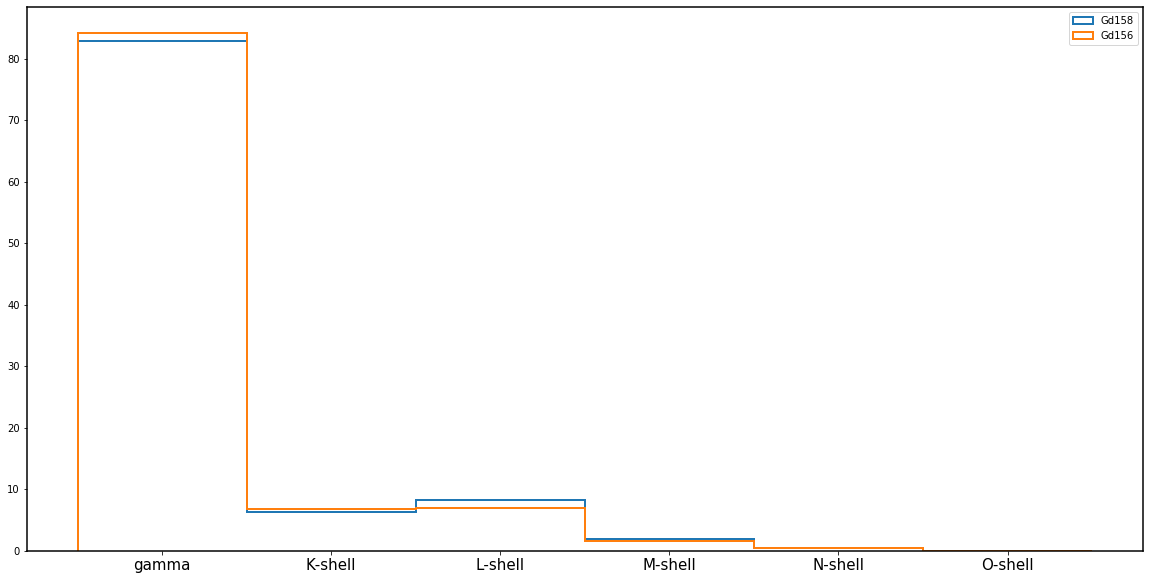

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.hist(bins, bins=range(7), weights=gd158_weights_p, label='Gd158', histtype='step', align='left', linewidth=2)
ax.hist(bins, bins=range(7), weights=gd156_weights_p, label='Gd156', histtype='step', align='left', linewidth=2)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
ax.tick_params(axis='x', labelsize=15)
ax.legend()
plt.show()

In [23]:
gd158_energy_step = [np.count_nonzero(shell) for shell in gd158_shells]
gd156_energy_step = [np.count_nonzero(shell) for shell in gd156_shells]
gd158_energy_step = [4 if x > 4 else x for x in gd158_energy_step]
gd156_energy_step = [4 if x > 4 else x for x in gd156_energy_step]

In [35]:
bins=range(6)
gd158_weights, _ = np.histogram(gd158_energy_step, bins=bins)
gd156_weights, _ = np.histogram(gd156_energy_step, bins=bins)
gd158_weights_p = gd158_weights / sum(gd158_weights) * 100
gd156_weights_p = gd156_weights / sum(gd156_weights) * 100
print(tabulate.tabulate([gd158_weights_p, gd156_weights_p], headers=['gamma-only', 'gamma + 1e', 'gamma + 2e', 'gamma + 3e', 'gamma + 4e']))

  gamma-only    gamma + 1e    gamma + 2e    gamma + 3e    gamma + 4e
------------  ------------  ------------  ------------  ------------
     26.8031       67.0329       6.09488       0.06848       0.00064
     29.8055       65.1064       5.00976       0.07648       0.00186


### Gamma spectrum

In [5]:
gd158_gamma_e, _ = gdls_physics.dicebox_simulation_reader.extract_gamma_electron_spectrum(gd158_shells, gd158_energies, separate_events=False)
gd156_gamma_e, _ = gdls_physics.dicebox_simulation_reader.extract_gamma_electron_spectrum(gd156_shells, gd156_energies, separate_events=False)

In [8]:
bins = np.arange(0,8000,100)
gd158_weights, _ = np.histogram(gd158_gamma_e, bins=bins)
gd156_weights, _ = np.histogram(gd156_gamma_e, bins=bins)
gdls_physics.dicebox_simulation_reader.save_for_latex(gd158_weights, bins, 'simulations/dicebox/latex_outputs/gd158_gamma_spectrum.txt', 'Lower\tUpper\tWeight\n', 'hist')
gdls_physics.dicebox_simulation_reader.save_for_latex(gd156_weights, bins, 'simulations/dicebox/latex_outputs/gd156_gamma_spectrum.txt', 'Lower\tUpper\tWeight\n', 'hist')

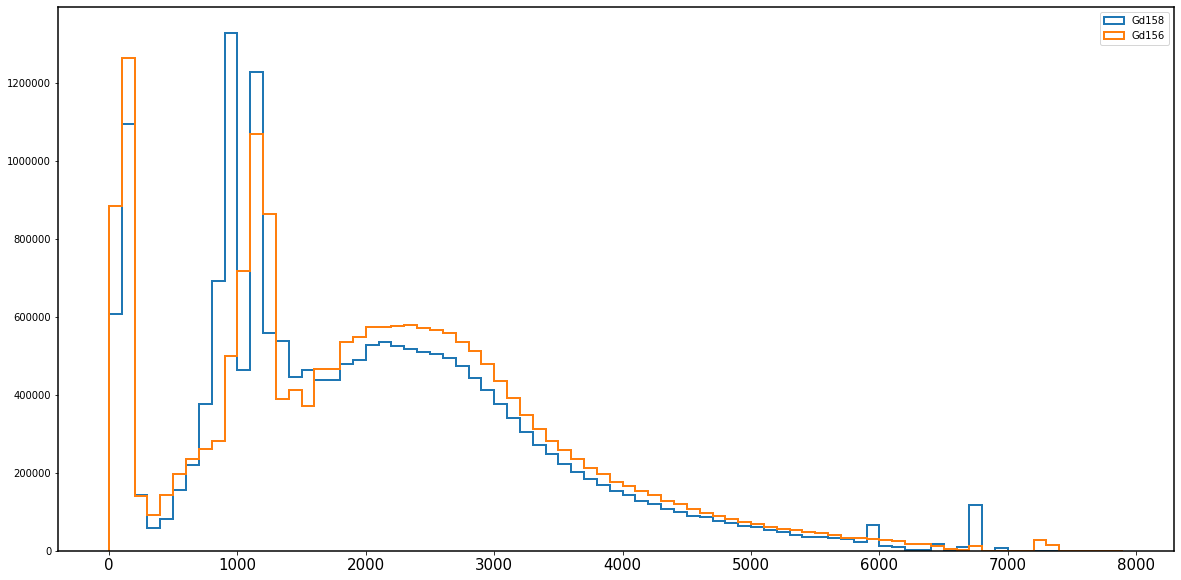

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.hist(bins[:-1], bins=bins, weights=gd158_weights, label='Gd158', histtype='step', linewidth=2)
ax.hist(bins[:-1], bins=bins, weights=gd156_weights, label='Gd156', histtype='step', linewidth=2)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
ax.tick_params(axis='x', labelsize=15)
ax.legend()
plt.show()

### Energy Fraction

In [4]:
gd158_gamma_frac, gd158_electron_frac = gdls_physics.dicebox_simulation_reader.get_gamma_electron_energy_fraction(gd158_shells, gd158_energies, 7937.39)
gd156_gamma_frac, gd156_electron_frac = gdls_physics.dicebox_simulation_reader.get_gamma_electron_energy_fraction(gd156_shells, gd156_energies, 8536.39)

In [45]:
bins=np.arange(0, 101, 1)
gd158_gamma_weights, _ = np.histogram(gd158_gamma_frac, bins=bins)
gd158_electron_weights, _ = np.histogram(gd158_electron_frac, bins=bins)
gd156_gamma_weights, _ = np.histogram(gd156_gamma_frac, bins=bins)
gd156_electron_weights, _ = np.histogram(gd156_electron_frac, bins=bins)
gdls_physics.dicebox_simulation_reader.save_for_latex(gd158_gamma_weights, bins, 'simulations/dicebox/latex_outputs/gd158_energy_fraction_gamma.txt', 'Lower\tUpper\tWeight\n', 'hist')
gdls_physics.dicebox_simulation_reader.save_for_latex(gd158_electron_weights, bins, 'simulations/dicebox/latex_outputs/gd158_energy_fraction_electron.txt', 'Lower\tUpper\tWeight\n', 'hist')
gdls_physics.dicebox_simulation_reader.save_for_latex(gd156_gamma_weights, bins, 'simulations/dicebox/latex_outputs/gd156_energy_fraction_gamma.txt', 'Lower\tUpper\tWeight\n', 'hist')
gdls_physics.dicebox_simulation_reader.save_for_latex(gd156_electron_weights, bins, 'simulations/dicebox/latex_outputs/gd156_energy_fraction_electron.txt', 'Lower\tUpper\tWeight\n', 'hist')

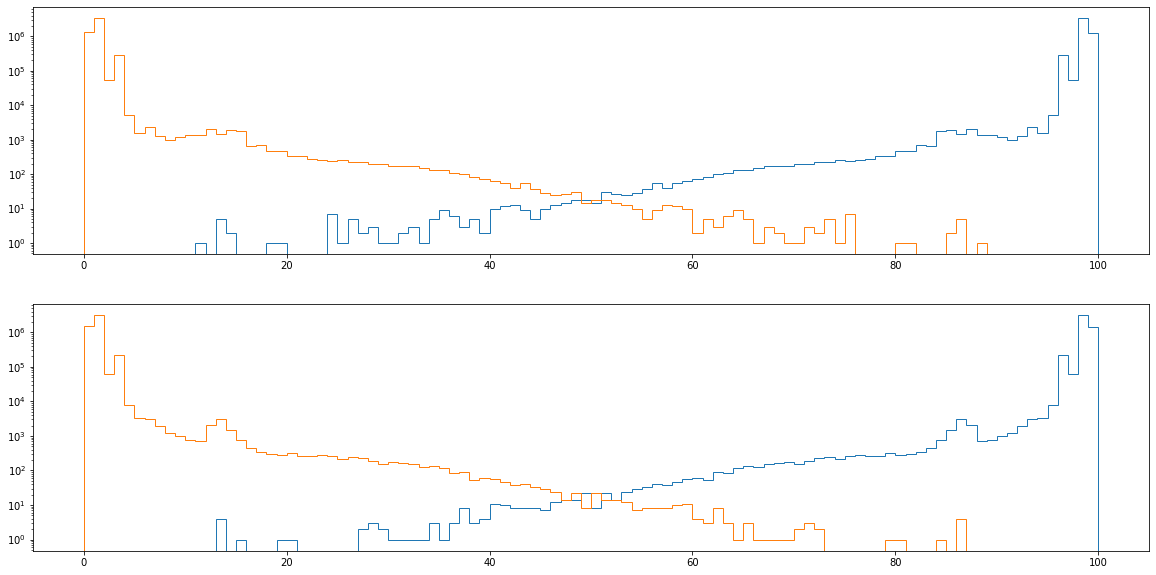

In [49]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
bins=np.arange(0, 101, 1)
ax[0].hist(bins[:-1], bins=bins, weights=gd158_gamma_weights, histtype='step', label='gamma')
ax[0].hist(bins[:-1], bins=bins, weights=gd158_electron_weights, histtype='step', label='electron')
ax[1].hist(bins[:-1], bins=bins, weights=gd156_gamma_weights, histtype='step', label='gamma')
ax[1].hist(bins[:-1], bins=bins, weights=gd156_electron_weights, histtype='step', label='electron')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.show()